In [ ]:
#Program to read an image from graphics file
#Program to convert binary image to indexed image and vice versa
#Program to convert matrix to grayscale image
#Program to convert an image to eight bit,16 bit unsigned integer
#Program to add noise to image

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'sobel' is not defined

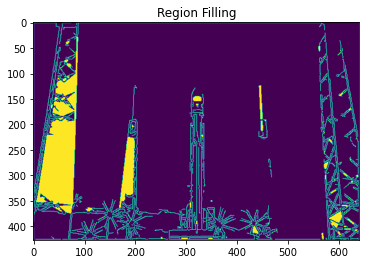

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage import data,morphology
from skimage.color import rgb2gray
import scipy.ndimage as nd
plt.rcParams["figure.figsize"] = (12,8)
%matplotlib inline
 
# load images and convert grayscale

rocket = data.rocket()

rocket_wh = rgb2gray(rocket)
 
# apply edge segmentation
# plot canny edge detection

edges = canny(rocket_wh)

plt.imshow(edges, interpolation='gaussian')

plt.title('Canny detector')
 
# fill regions to perform edge segmentation

fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)

plt.title('Region Filling')
 
# Region Segmentation
# First we print the elevation map

elevation_map = sobel(rocket_wh)
plt.imshow(elevation_map)
 
# Since, the contrast difference is not much. Anyways we will perform it

markers = np.zeros_like(rocket_wh)

markers[rocket_wh < 0.1171875] = 1 # 30/255

markers[rocket_wh > 0.5859375] = 2 # 150/255
 
plt.imshow(markers)

plt.title('markers')
 
# Perform watershed region segmentation 

segmentation = morphology.watershed(elevation_map, markers)
 
plt.imshow(segmentation)

plt.title('Watershed segmentation')
 
# plot overlays and contour

segmentation = nd.binary_fill_holes(segmentation - 1)

label_rock, _ = nd.label(segmentation)
# overlay image with different labels

image_label_overlay = label2rgb(label_rock, image=rocket_wh)
 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(rocket_wh)

ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
ax2.imshow(image_label_overlay)
 

fig.subplots_adjust(**margins)

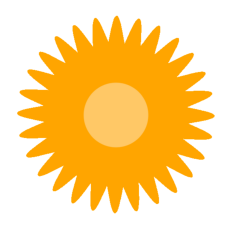

In [5]:
#Program to read an image from graphics file
import matplotlib.pyplot as plt
from matplotlib.image import imread

def read_gif_image(file_path):
    try:
        # Read the GIF image
        img = imread(file_path)
        return img
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", e)

# Example usage
if __name__ == "__main__":
    file_path = "sun.gif"  # Replace with the path to your GIF image file
    image = read_gif_image(file_path)
    if image is not None:
        plt.imshow(image)
        plt.axis('off')  # Hide axis
        plt.show()
    else:
        print("Failed to load the image.")
        
#Output by default first image

Frames extracted from the GIF file.


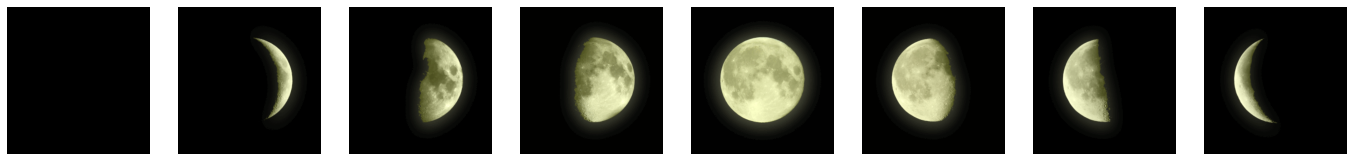

In [6]:
#Program to read an image from graphics file
import matplotlib.pyplot as plt
from PIL import Image

def extract_frames_from_gif(file_path):
    try:
        # Open the GIF file
        gif = Image.open(file_path)
        
        # Extract frames
        frames = []
        while True:
            try:
                frames.append(gif.copy())
                gif.seek(gif.tell() + 1)
            except EOFError:
                break
        
        return frames
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", e)

# Display frames using matplotlib
def display_frames(frames):
    num_frames = len(frames)
    fig, axes = plt.subplots(1, num_frames, figsize=(num_frames * 3, 3))
    
    for i, frame in enumerate(frames):
        axes[i].imshow(frame)
        axes[i].axis('off')
        
    plt.show()

# Example usage
if __name__ == "__main__":
    file_path = "moon.gif"  # Replace with the path to your GIF image file
    frames = extract_frames_from_gif(file_path)
    if frames:
        print("Frames extracted from the GIF file.")
        display_frames(frames)
    else:
        print("Failed to extract frames from the GIF file.")

#Output in different frames

Frames extracted from the GIF file.


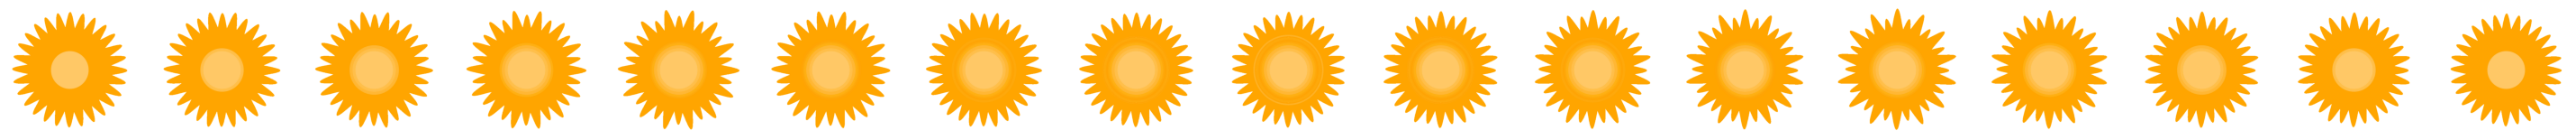

In [7]:
#Program to read an image from graphics file
import matplotlib.pyplot as plt
from PIL import Image

def extract_frames_from_gif(file_path):
    try:
        # Open the GIF file
        gif = Image.open(file_path)
        
        # Extract frames
        frames = []
        while True:
            try:
                frames.append(gif.copy())
                gif.seek(gif.tell() + 1)
            except EOFError:
                break
        
        return frames
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", e)

# Display frames using matplotlib
def display_frames(frames):
    num_frames = len(frames)
    fig, axes = plt.subplots(1, num_frames, figsize=(num_frames * 3, 3))
    
    for i, frame in enumerate(frames):
        axes[i].imshow(frame)
        axes[i].axis('off')
        
    plt.show()

# Example usage
if __name__ == "__main__":
    file_path = "sun.gif"  # Replace with the path to your GIF image file
    frames = extract_frames_from_gif(file_path)
    if frames:
        print("Frames extracted from the GIF file.")
        display_frames(frames)
    else:
        print("Failed to extract frames from the GIF file.")

#Output in different frames

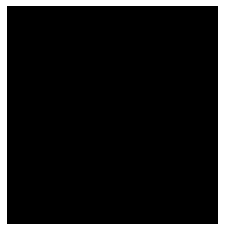

In [8]:
#Program to read an image from graphics file
import matplotlib.pyplot as plt
from matplotlib.image import imread

def read_gif_image(file_path):
    try:
        # Read the GIF image
        img = imread(file_path)
        return img
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", e)

# Example usage
if __name__ == "__main__":
    file_path = "moon.gif"  # Replace with the path to your GIF image file
    image = read_gif_image(file_path)
    if image is not None:
        plt.imshow(image)
        plt.axis('off')  # Hide axis
        plt.show()
    else:
        print("Failed to load the image.")
        
#Output by default first image

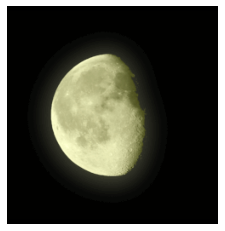

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

def read_image_frame(file_path, frame_index):
    try:
        # Open the image file
        img = Image.open(file_path)

        # If it's a GIF file, navigate to the specified frame
        if img.format == 'GIF':
            img.seek(frame_index)

        return img
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", e)

# Display image using matplotlib
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
if __name__ == "__main__":
    file_path = "moon.gif"  # Replace with the path to your image file
    frame_index = 5  # Index of the frame you want to display
    image_frame = read_image_frame(file_path, frame_index)
    if image_frame:
        display_image(image_frame)
    else:
        print("Failed to read the image frame.")

#Output with specified index 

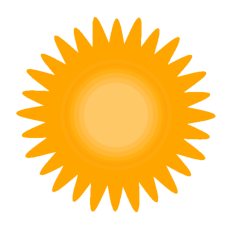

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

def read_image_frame(file_path, frame_index):
    try:
        # Open the image file
        img = Image.open(file_path)

        # If it's a GIF file, navigate to the specified frame
        if img.format == 'GIF':
            img.seek(frame_index)

        return img
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print("An error occurred:", e)

# Display image using matplotlib
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
if __name__ == "__main__":
    file_path = "sun.gif"  # Replace with the path to your image file
    frame_index = 6  # Index of the frame you want to display
    image_frame = read_image_frame(file_path, frame_index)
    if image_frame:
        display_image(image_frame)
    else:
        print("Failed to read the image frame.")

#Output with specified index 

Indexed Image


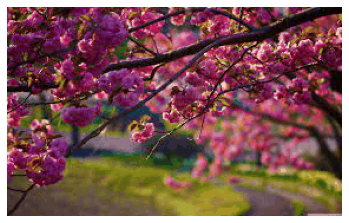

Binary Image


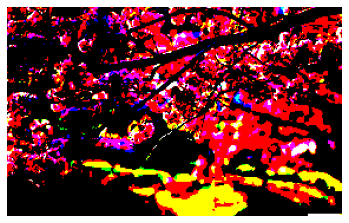

In [20]:
#Program to convert binary image to indexed image and vice versa
import matplotlib.pyplot as plt
from PIL import Image

def binary_to_indexed(binary_img_path):
    # Open binary image
    binary_img = Image.open(binary_img_path)

    # Convert binary image to indexed image
    indexed_img = binary_img.convert("P", palette=Image.ADAPTIVE)

    return indexed_img

def indexed_to_binary(indexed_img_path, threshold=128):
    # Open indexed image
    indexed_img = Image.open(indexed_img_path)

    # Convert indexed image to binary image
    binary_img = indexed_img.point(lambda p: p > threshold and 255)

    return binary_img

# Display image using Matplotlib
def display_image(image):
    plt.imshow(image, cmap='gray')  # Assuming the image is grayscale
    plt.axis('off')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Convert binary image to indexed image
    print("Indexed Image")
    indexed_img = binary_to_indexed("C:/Users/ADMIN/Pictures/flower.jpg")

    # Display indexed image
    display_image(indexed_img)

    # Convert indexed image back to binary image
    print("Binary Image")
    binary_img = indexed_to_binary("C:/Users/ADMIN/Pictures/flower.jpg")

    # Display binary image
    display_image(binary_img)


Indexed Image


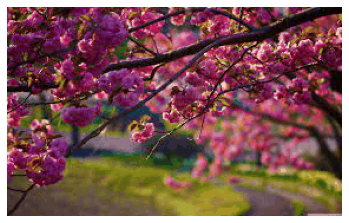

Binary Image


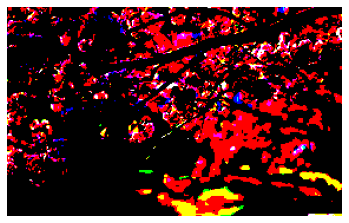

In [24]:
#Program to convert binary image to indexed image and vice versa
import matplotlib.pyplot as plt
from PIL import Image

def binary_to_indexed(binary_img_path):
    # Open binary image
    binary_img = Image.open(binary_img_path)

    # Convert binary image to indexed image
    indexed_img = binary_img.convert("P", palette=Image.ADAPTIVE)

    return indexed_img

def indexed_to_binary(indexed_img_path, threshold=150):
    # Open indexed image
    indexed_img = Image.open(indexed_img_path)

    # Convert indexed image to binary image
    binary_img = indexed_img.point(lambda p: p > threshold and 255)

    return binary_img

# Display image using Matplotlib
def display_image(image):
    plt.imshow(image, cmap='gray')  # Assuming the image is grayscale
    plt.axis('off')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Convert binary image to indexed image
    print("Indexed Image")
    indexed_img = binary_to_indexed("C:/Users/ADMIN/Pictures/flower.jpg")

    # Display indexed image
    display_image(indexed_img)

    # Convert indexed image back to binary image
    print("Binary Image")
    binary_img = indexed_to_binary("C:/Users/ADMIN/Pictures/flower.jpg")

    # Display binary image
    display_image(binary_img)

#Output with different threshold value

In [ ]:
import cv2

def count_petals(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Display the total number of contours (assumed petals)
    print("Total number of petals:", len(contours))

    # Display the image with contours
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
    cv2.imshow("Contours", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
if __name__ == "__main__":
    image_path = "flower_image.jpg"  # Replace with the path to your flower image
    count_petals(image_path)
